In [1]:
import numpy as np
import pandas as pd
import copy
import cv2
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image

# 1 Preprocessing
Data was prior preprocessed (cropped from the form, split to the files). This project starts after those operations were made.

## 1.1 Estimate width of the input image, overview of the input data
Due to the method how the forms are scannede, crop 15 px from left.

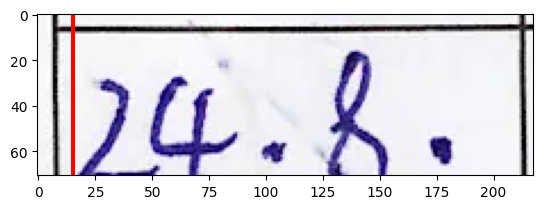

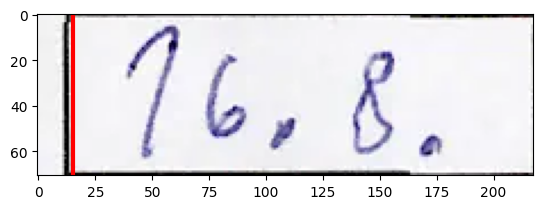

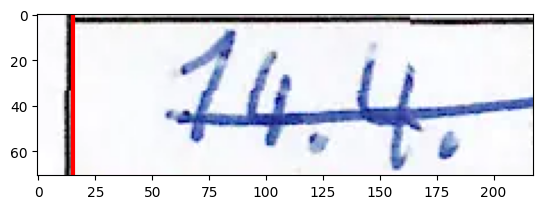

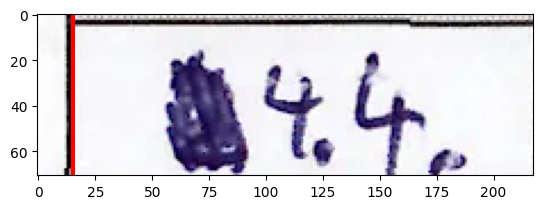

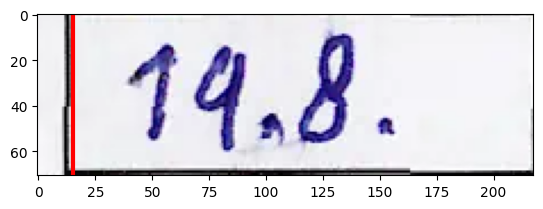

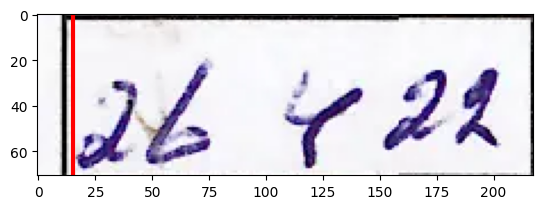

In [2]:
img_paths = pd.read_csv('data-dates/_labels.csv')['path'].tolist()

for i, img in enumerate(img_paths):
    if i < 100 or i > 105:
        continue
    
    img = Image.open(img)
    plt.imshow(img)
    plt.axvline(x=15, color='red', linewidth=3)
    plt.show()    

Get width and height of the preprocessed image.

## 1.2 Set constants
Set constants, and other parameteres.

In [3]:
IMG_WIDTH = 188
IMG_HEIGHT = 71
IMG_WIDTH_ORIGINAL = IMG_WIDTH + 15
IMG_HEIGHT_ORIGINAL = IMG_HEIGHT
IMG_SIZE = (IMG_WIDTH, IMG_HEIGHT)

data_path = 'data-dates/_labels.csv'
data_path_processed = 'data-dates-processed/_labels.csv'

## 1.3 Image preprocessing
For the YOLO segmentation model. The following preprocessing is done:
- Cropping (based on section 1.2)
- Thresholding, keep only pixels above 215 (in order to have more clear boundaries and remove noise)
- Binarization, all the values are either 0 or 255
- Erosion, with the preprocessing, it turned out that eroding the images improves YOLO predictions

In [4]:
def convert_from_image_to_cv2(img: Image) -> np.ndarray:
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
img_paths = pd.read_csv('data-dates/_labels.csv')

annotations = []
len_annotations = 0

for idx, row in img_paths.iterrows():

    if idx < len_annotations:
        continue
    
    print(idx, end=' ')
    img = Image.open(row['path'])
    img = convert_from_image_to_cv2(img)
    
    # Convert to gray scale, erode and crop the edges
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 215, 255, cv2.THRESH_BINARY)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    eroded_image = cv2.erode(thresholded, rect_kernel, iterations = 1)
    eroded_image[0:2, :] = 255
    eroded_image[:, 0:2] = 255
    eroded_image[:, -2:] = 255
    eroded_image[-2:, :] = 255    

    cropped_image = eroded_image[0:IMG_HEIGHT_ORIGINAL, 15:]
    
    filename = path = Path(row['path']).name
    save_path = f'data-dates-processed/{filename}'
    img = Image.fromarray(cropped_image)
    img.save(save_path)
    annotations.append({'path': save_path, 'label': row['label']})
    pd.DataFrame(annotations).to_csv('data-dates-processed/_labels.csv')    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

## 1.4 Results
Display results after YOLO preprocessing.
- Noise is removed
- Image is cropped
- Objects have more clear contours

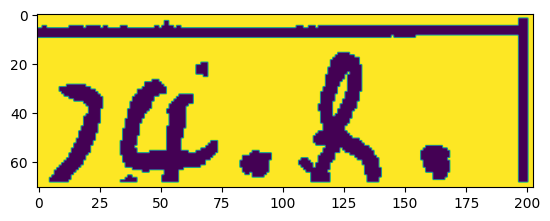

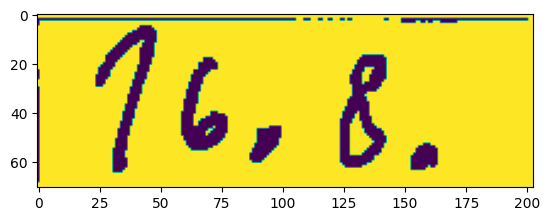

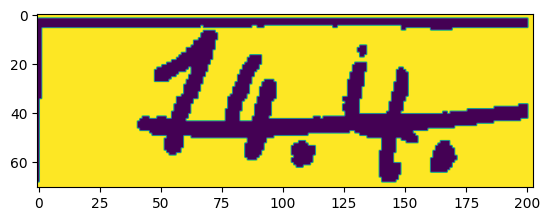

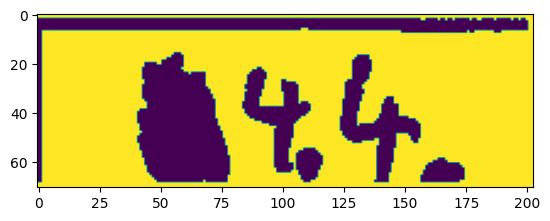

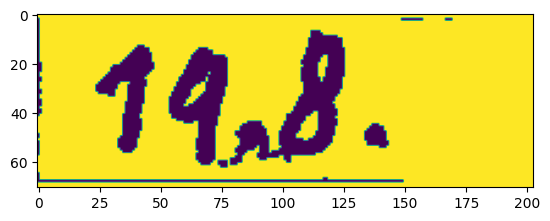

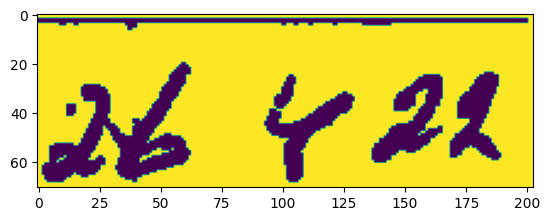

In [5]:
img_paths = pd.read_csv('data-dates-processed/_labels.csv')['path'].tolist()

for i, img in enumerate(img_paths):
    if i < 100 or i > 105:
        continue
    
    img = Image.open(img)
    plt.imshow(img)
    plt.show()    